In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.optimize import curve_fit
import statsmodels.api as sm
from statsmodels.nonparametric.smoothers_lowess import lowess

# Assuming df is your dataframe with the patent data
df = pd.read_csv('data_with_cost.csv')

In [39]:

def market_value_analysis(df):
    """
    Analyzes market value, market rate, and mean value of patents
    """
    print("Performing Market Value Analysis...")
    
    # 1. Distribution of market value, market rate, and mean value
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    sns.histplot(df['Patent Value'], kde=True, ax=axes[0])
    axes[0].set_title('Patent Value Distribution')
    axes[0].set_xlabel('Patent Value')
    axes[0].grid(True, alpha=0.3)
    
    sns.histplot(df['Market Rate'], kde=True, ax=axes[1])
    axes[1].set_title('Market Rate Distribution')
    axes[1].set_xlabel('Market Rate')
    axes[1].grid(True, alpha=0.3)
    
    sns.histplot(df['Mean Value'], kde=True, ax=axes[2])
    axes[2].set_title('Mean Value Distribution')
    axes[2].set_xlabel('Mean Value')
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 2. Calculate and display key statistics
    value_stats = {
        'Patent Value': df['Patent Value'].describe(),
        'Market Rate': df['Market Rate'].describe(),
        'Mean Value': df['Mean Value'].describe()
    }
    
    print("\nKey Value Statistics:")
    print(pd.DataFrame(value_stats))
    
    # 3. Correlation matrix between value metrics
    value_metrics = df[['Patent Value', 'Market Rate', 'Mean Value', 'Assigned Cost', 'patent cost']]
    corr_matrix = value_metrics.corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Between Value Metrics')
    plt.tight_layout()
    plt.show()
    
    # 4. Scatter plot matrix for value metrics
    sns.pairplot(value_metrics)
    plt.suptitle('Relationship Between Different Value Metrics', y=1.02)
    plt.show()
    
    # 5. Value metrics over time
    if 'earliest priority year' in df.columns:
        yearly_values = df.groupby('earliest priority year').agg({
            'Patent Value': 'mean',
            'Market Rate': 'mean',
            'Mean Value': 'mean'
        })
        
        plt.figure(figsize=(12, 6))
        yearly_values.plot(marker='o')
        plt.title('Average Value Metrics Over Time')
        plt.xlabel('Year')
        plt.ylabel('Value')
        plt.grid(True, alpha=0.3)
        plt.legend(title='Metric')
        plt.tight_layout()
        plt.show()
    
    # 6. Value by technology area (CPC)
    tech_values = df.groupby('Primary_CPC').agg({
        'Patent Value': 'mean',
        'Market Rate': 'mean',
        'Mean Value': 'mean',
        'Title': 'count'
    }).sort_values('Patent Value', ascending=False)
    
    tech_values.columns = ['Avg Patent Value', 'Avg Market Rate', 'Avg Mean Value', 'Patent Count']
    
    # Plot value metrics for top 10 technology areas
    top_techs = tech_values.head(10).index
    
    fig, axes = plt.subplots(3, 1, figsize=(14, 15))
    
    tech_values.loc[top_techs, 'Avg Patent Value'].plot(kind='bar', ax=axes[0], color='skyblue')
    axes[0].set_title('Average Patent Value by Technology Area (Top 10)')
    axes[0].set_ylabel('Average Patent Value')
    axes[0].set_xticklabels([])
    axes[0].grid(True, alpha=0.3, axis='y')
    
    tech_values.loc[top_techs, 'Avg Market Rate'].plot(kind='bar', ax=axes[1], color='lightgreen')
    axes[1].set_title('Average Market Rate by Technology Area (Top 10)')
    axes[1].set_ylabel('Average Market Rate')
    axes[1].set_xticklabels([])
    axes[1].grid(True, alpha=0.3, axis='y')
    
    tech_values.loc[top_techs, 'Avg Mean Value'].plot(kind='bar', ax=axes[2], color='salmon')
    axes[2].set_title('Average Mean Value by Technology Area (Top 10)')
    axes[2].set_ylabel('Average Mean Value')
    axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')
    axes[2].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # 7. Value by country (if available)
    if 'Country' in df.columns:
        country_values = df.groupby('Country').agg({
            'Patent Value': 'mean',
            'Market Rate': 'mean',
            'Mean Value': 'mean',
            'Title': 'count'
        }).sort_values('Patent Value', ascending=False)
        
        country_values.columns = ['Avg Patent Value', 'Avg Market Rate', 'Avg Mean Value', 'Patent Count']
        
        # Plot for top 10 countries
        top_countries = country_values.head(10).index
        
        fig, axes = plt.subplots(3, 1, figsize=(14, 15))
        
        country_values.loc[top_countries, 'Avg Patent Value'].plot(kind='bar', ax=axes[0], color='skyblue')
        axes[0].set_title('Average Patent Value by Country (Top 10)')
        axes[0].set_ylabel('Average Patent Value')
        axes[0].set_xticklabels([])
        axes[0].grid(True, alpha=0.3, axis='y')
        
        country_values.loc[top_countries, 'Avg Market Rate'].plot(kind='bar', ax=axes[1], color='lightgreen')
        axes[1].set_title('Average Market Rate by Country (Top 10)')
        axes[1].set_ylabel('Average Market Rate')
        axes[1].set_xticklabels([])
        axes[1].grid(True, alpha=0.3, axis='y')
        
        country_values.loc[top_countries, 'Avg Mean Value'].plot(kind='bar', ax=axes[2], color='salmon')
        axes[2].set_title('Average Mean Value by Country (Top 10)')
        axes[2].set_ylabel('Average Mean Value')
        axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')
        axes[2].grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.show()
    
    # 8. Value by patent age
    if 'Patent Age' in df.columns:
        plt.figure(figsize=(12, 6))
        
        plt.scatter(df['Patent Age'], df['Patent Value'], alpha=0.5, label='Patent Value')
        plt.scatter(df['Patent Age'], df['Market Rate'], alpha=0.5, label='Market Rate')
        plt.scatter(df['Patent Age'], df['Mean Value'], alpha=0.5, label='Mean Value')
        
        # Add regression lines
        for col, color in zip(['Patent Value', 'Market Rate', 'Mean Value'], ['blue', 'green', 'red']):
            X = df['Patent Age']
            y = df[col]
            X = sm.add_constant(X)
            model = sm.OLS(y, X).fit()
            
            x_range = np.linspace(df['Patent Age'].min(), df['Patent Age'].max(), 100)
            X_pred = sm.add_constant(x_range)
            y_pred = model.predict(X_pred)
            
            plt.plot(x_range, y_pred, color=color, linestyle='--')
        
        plt.title('Value Metrics vs. Patent Age')
        plt.xlabel('Patent Age (years)')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    # 9. Ratio analysis (Market Rate to Patent Value)
    df['Market_to_Value_Ratio'] = df['Market Rate'] / df['Patent Value']
    
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Market_to_Value_Ratio'].clip(0, 5), kde=True, bins=30)
    plt.title('Distribution of Market Rate to Patent Value Ratio')
    plt.xlabel('Market Rate / Patent Value')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Calculate the average ratios
    print("\nValue Metric Ratios:")
    print(f"Average Market Rate to Patent Value Ratio: {df['Market Rate'].mean() / df['Patent Value'].mean():.2f}")
    print(f"Average Mean Value to Patent Value Ratio: {df['Mean Value'].mean() / df['Patent Value'].mean():.2f}")
    print(f"Average Market Rate to Mean Value Ratio: {df['Market Rate'].mean() / df['Mean Value'].mean():.2f}")
    
    return {
        "avg_patent_value": df['Patent Value'].mean(),
        "avg_market_rate": df['Market Rate'].mean(),
        "avg_mean_value": df['Mean Value'].mean(),
        "tech_values": tech_values.to_dict()
    }

In [40]:
df= df.drop('Unnamed: 11',axis=1)

In [41]:
df=df.drop('Assigned Cost',axis = 1)

In [42]:
df=df.drop('Patent Value',axis=1)

In [43]:
df = df.reset_index()

In [47]:
df= df.drop(['Unnamed: 0','No'],axis=1)

In [53]:
df = df.drop('Primary_CPC',axis=1)

In [56]:
df= df.drop('Patent Age',axis=1)

In [68]:
df= df.drop(['first publication country','second publication country'],axis=1)

In [61]:
df[['Mean Value' , 'Market Rate' , 'Country' , 'first publication country','second publication country','patent cost']]

,Mean Value,Market Rate,Country,first publication country,second publication country,patent cost
0,15654.929577,15654.929577,US,US,NaN,16000.0
1,15654.929577,15654.929577,KR,KR,NaN,25000.0
2,15654.929577,15654.929577,KR,KR,NaN,25000.0
3,15654.929577,15654.929577,WO,WO,WO,9000.0
4,15654.929577,15654.929577,US,US,NaN,16000.0
...,...,...,...,...,...,...
492,15654.929577,15654.929577,CN,CN,NaN,14000.0
493,15654.929577,15654.929577,CN,CN,NaN,14000.0
494,15654.929577,15654.929577,CN,CN,NaN,14000.0
495,15654.929577,15654.929577,CN,CN,NaN,14000.0


In [65]:
df=df.drop(['Mean Value' , 'Market Rate'],axis=1)

In [ ]:
df.to_csv('data_with_cost_clean.csv')

In [69]:
df.columns

Index(['index', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'first publication date',
       'second publication date', 'first publication number',
       'second publication number', 'first filing year',
       'earliest priority year', 'applicant country', 'Applicant Type',
       'Country', 'Publication Year', 'patent cost'],
      dtype='object')

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

def plot_distribution(df, column, title, ax):
    sns.histplot(df[column], kde=True, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(column)
    ax.grid(True, alpha=0.3)

def display_value_statistics(df, columns):
    value_stats = {col: df[col].describe() for col in columns}
    print("\nKey Value Statistics:")
    print(pd.DataFrame(value_stats))

def plot_correlation_matrix(df, columns):
    corr_matrix = df[columns].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Between Value Metrics')
    plt.tight_layout()
    plt.show()

def plot_scatter_matrix(df, columns):
    sns.pairplot(df[columns])
    plt.suptitle('Relationship Between Different Value Metrics', y=1.02)
    plt.show()

def plot_value_over_time(df, time_column, value_columns):
    yearly_values = df.groupby(time_column).agg({col: 'mean' for col in value_columns})
    plt.figure(figsize=(12, 6))
    yearly_values.plot(marker='o')
    plt.title('Average Value Metrics Over Time')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.grid(True, alpha=0.3)
    plt.legend(title='Metric')
    plt.tight_layout()
    plt.show()

def plot_value_by_category(df, category_column, value_columns, top_n=10):
    category_values = df.groupby(category_column).agg({col: 'mean' for col in value_columns})
    category_values = category_values.sort_values(value_columns[0], ascending=False).head(top_n)
    category_values.plot(kind='bar', figsize=(14, 6))
    plt.title(f'Average Value Metrics by {category_column} (Top {top_n})')
    plt.ylabel('Value')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

def plot_value_vs_age(df, age_column, value_columns):
    plt.figure(figsize=(12, 6))
    for col, color in zip(value_columns, ['blue', 'green', 'red']):
        plt.scatter(df[age_column], df[col], alpha=0.5, label=col, color=color)
        X = sm.add_constant(df[age_column])
        model = sm.OLS(df[col], X).fit()
        x_range = np.linspace(df[age_column].min(), df[age_column].max(), 100)
        y_pred = model.predict(sm.add_constant(x_range))
        plt.plot(x_range, y_pred, color=color, linestyle='--')
    plt.title('Value Metrics vs. Patent Age')
    plt.xlabel('Patent Age (years)')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_market_to_value_ratio(df, market_column, value_column):
    df['Market_to_Value_Ratio'] = df[market_column] / df[value_column]
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Market_to_Value_Ratio'].clip(0, 5), kde=True, bins=30)
    plt.title('Distribution of Market Rate to Patent Value Ratio')
    plt.xlabel('Market Rate / Patent Value')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def market_value_analysis(df):
    print("Performing Market Value Analysis...")
    
    # Plot distributions
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for col, ax in zip(['Patent Value', 'Market Rate', 'Mean Value'], axes):
        plot_distribution(df, col, f'{col} Distribution', ax)
    plt.tight_layout()
    plt.show()
    
    # Display statistics
    display_value_statistics(df, ['Patent Value', 'Market Rate', 'Mean Value'])
    
    # Correlation matrix
    plot_correlation_matrix(df, ['Patent Value', 'Market Rate', 'Mean Value', 'Assigned Cost', 'patent cost'])
    
    # Scatter plot matrix
    plot_scatter_matrix(df, ['Patent Value', 'Market Rate', 'Mean Value', 'Assigned Cost', 'patent cost'])
    
    # Value over time
    if 'earliest priority year' in df.columns:
        plot_value_over_time(df, 'earliest priority year', ['Patent Value', 'Market Rate', 'Mean Value'])
    
    # Value by technology area
    if 'Primary_CPC' in df.columns:
        plot_value_by_category(df, 'Primary_CPC', ['Patent Value', 'Market Rate', 'Mean Value'])
    
    # Value by country
    if 'Country' in df.columns:
        plot_value_by_category(df, 'Country', ['Patent Value', 'Market Rate', 'Mean Value'])
    
    # Value vs. Patent Age
    if 'Patent Age' in df.columns:
        plot_value_vs_age(df, 'Patent Age', ['Patent Value', 'Market Rate', 'Mean Value'])
    
    # Market to Value Ratio
    plot_market_to_value_ratio(df, 'Market Rate', 'Patent Value')
    
    # Calculate and return summary
    return {
        "avg_patent_value": df['Patent Value'].mean(),
        "avg_market_rate": df['Market Rate'].mean(),
        "avg_mean_value": df['Mean Value'].mean()
    }


Performing Market Value Analysis...


KeyError: 'Patent Value'

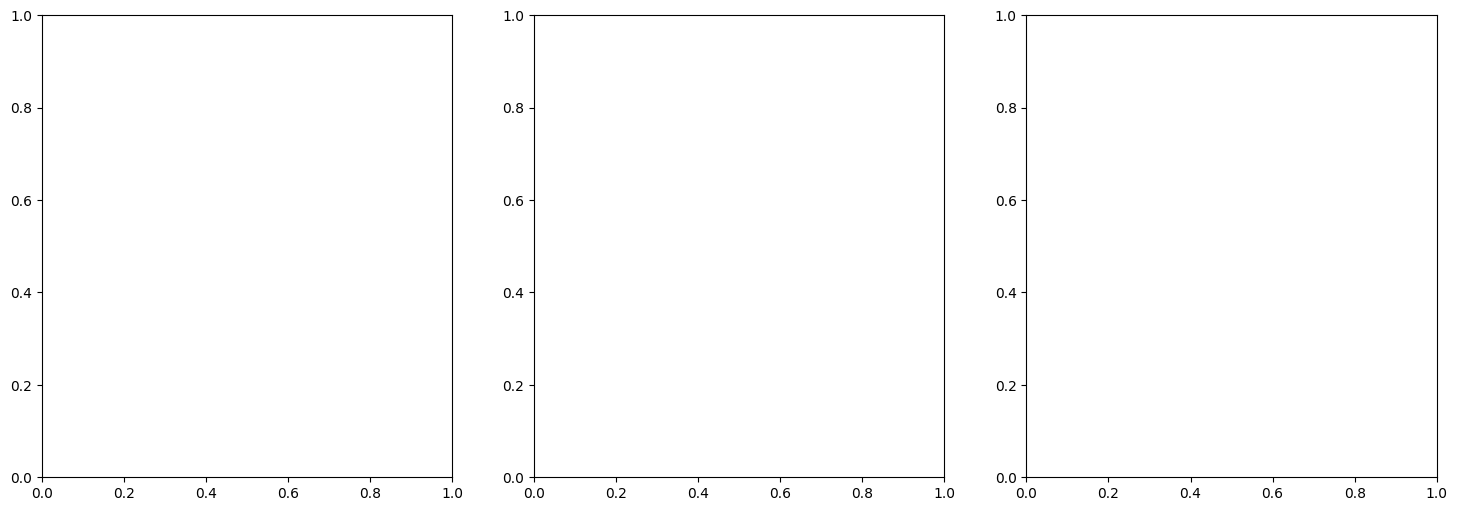

In [46]:
market_value_analysis(df)

In [ ]:

def market_strategy_analysis(df):
    """
    Analyzes the patent portfolio to determine optimal market strategy based on value metrics
    """
    print("\nPerforming Market Strategy Analysis Based on Value Metrics...")
    
    # 1. Value-based portfolio segmentation
    # Create bins based on percentiles for patent value
    value_bins = [0, df['Patent Value'].quantile(0.25), df['Patent Value'].quantile(0.5), 
                 df['Patent Value'].quantile(0.75), df['Patent Value'].max()]
    value_labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
    
    df['Value_Segment'] = pd.cut(df['Patent Value'], bins=value_bins, labels=value_labels)
    
    # Create bins for market rate
    market_bins = [0, df['Market Rate'].quantile(0.25), df['Market Rate'].quantile(0.5), 
                  df['Market Rate'].quantile(0.75), df['Market Rate'].max()]
    market_labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
    
    df['Market_Segment'] = pd.cut(df['Market Rate'], bins=market_bins, labels=market_labels)
    
    # 2. Create a portfolio matrix visualization
    portfolio_matrix = pd.crosstab(df['Value_Segment'], df['Market_Segment'])
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(portfolio_matrix, annot=True, cmap='viridis', fmt='d', cbar_kws={'label': 'Number of Patents'})
    plt.title('Patent Portfolio Segmentation Matrix')
    plt.xlabel('Market Rate Segment')
    plt.ylabel('Patent Value Segment')
    plt.tight_layout()
    plt.show()
    
    # 3. Calculate the total value in each segment
    value_sum_matrix = df.pivot_table(
        values='Patent Value', 
        index='Value_Segment', 
        columns='Market_Segment', 
        aggfunc='sum'
    )
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(value_sum_matrix, annot=True, cmap='viridis', fmt='.2f', cbar_kws={'label': 'Total Patent Value'})
    plt.title('Total Patent Value by Portfolio Segment')
    plt.xlabel('Market Rate Segment')
    plt.ylabel('Patent Value Segment')
    plt.tight_layout()
    plt.show()
    
    # 4. Strategic recommendations based on portfolio segments
    high_value_high_market = df[(df['Value_Segment'] == 'High') & (df['Market_Segment'] == 'High')]
    high_value_low_market = df[(df['Value_Segment'] == 'High') & (df['Market_Segment'] == 'Low')]
    low_value_high_market = df[(df['Value_Segment'] == 'Low') & (df['Market_Segment'] == 'High')]
    
    print("\nStrategic Portfolio Segments:")
    print(f"1. Star Patents (High Value, High Market): {len(high_value_high_market)} patents")
    print(f"   Average Patent Value: ${high_value_high_market['Patent Value'].mean():,.2f}")
    print(f"   Average Market Rate: ${high_value_high_market['Market Rate'].mean():,.2f}")
    
    print(f"\n2. Undervalued Patents (High Value, Low Market): {len(high_value_low_market)} patents")
    print(f"   Average Patent Value: ${high_value_low_market['Patent Value'].mean():,.2f}")
    print(f"   Average Market Rate: ${high_value_low_market['Market Rate'].mean():,.2f}")
    
    print(f"\n3. Overvalued Patents (Low Value, High Market): {len(low_value_high_market)} patents")
    print(f"   Average Patent Value: ${low_value_high_market['Patent Value'].mean():,.2f}")
    print(f"   Average Market Rate: ${low_value_high_market['Market Rate'].mean():,.2f}")
    
    # 5. Strategic technology areas analysis
    tech_strategy = df.groupby('Primary_CPC').agg({
        'Patent Value': ['mean', 'sum'],
        'Market Rate': ['mean', 'sum'],
        'Mean Value': 'mean',
        'Title': 'count'
    })
    
    tech_strategy.columns = ['Avg Patent Value', 'Total Patent Value', 
                           'Avg Market Rate', 'Total Market Rate',
                           'Avg Mean Value', 'Patent Count']
    
    # Add value to market ratio 
    tech_strategy['Value_to_Market_Ratio'] = tech_strategy['Avg Patent Value'] / tech_strategy['Avg Market Rate']
    
    # Sort by total market rate
    tech_strategy = tech_strategy.sort_values('Total Market Rate', ascending=False)
    
    print("\nTop 5 Technology Areas by Total Market Rate:")
    for i, (tech, row) in enumerate(tech_strategy.head(5).iterrows()):
        print(f"{i+1}. {tech}")
        print(f"   Total Market Rate: ${row['Total Market Rate']:,.2f}")
        print(f"   Total Patent Value: ${row['Total Patent Value']:,.2f}")
        print(f"   Patents: {row['Patent Count']}")
        print(f"   Value to Market Ratio: {row['Value_to_Market_Ratio']:.2f}")
    
    return {
        "portfolio_matrix": portfolio_matrix.to_dict(),
        "high_value_techs": tech_strategy.sort_values('Avg Patent Value', ascending=False).head(5).index.tolist(),
        "high_market_techs": tech_strategy.sort_values('Avg Market Rate', ascending=False).head(5).index.tolist(),
        "undervalued_techs": tech_strategy.sort_values('Value_to_Market_Ratio', ascending=False).head(5).index.tolist()
    }

In [ ]:
def market_size_estimation(df):
    """
    Estimates the market size based on market rate and patent value
    """
    print("\nPerforming Market Size Estimation...")
    
    # 1. Calculate the total market size based on Market Rate
    total_market = df['Market Rate'].sum()
    
    # 2. Calculate the realized value based on Patent Value
    total_value = df['Patent Value'].sum()
    
    # 3. Calculate the mean value
    total_mean_value = df['Mean Value'].sum()
    
    print(f"Total Market Size (based on Market Rate): ${total_market:,.2f}")
    print(f"Total Patent Value: ${total_value:,.2f}")
    print(f"Total Mean Value: ${total_mean_value:,.2f}")
    print(f"Market Capture Ratio (Value/Market): {(total_value/total_market)*100:.2f}%")
    
    # 4. Market size by technology area
    market_by_tech = df.groupby('Primary_CPC').agg({
        'Market Rate': 'sum',
        'Patent Value': 'sum',
        'Mean Value': 'sum',
        'Title': 'count'
    }).sort_values('Market Rate', ascending=False)
    
    market_by_tech['Market Share (%)'] = market_by_tech['Market Rate'] / total_market * 100
    market_by_tech['Value Share (%)'] = market_by_tech['Patent Value'] / total_value * 100
    
    plt.figure(figsize=(12, 6))
    market_by_tech['Market Share (%)'].head(10).plot(kind='bar', color='skyblue')
    plt.title('Market Share by Technology Area (Top 10)')
    plt.xlabel('Primary CPC')
    plt.ylabel('Market Share (%)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
    
    # 5. Compare market rate to patent value by technology
    plt.figure(figsize=(12, 6))
    
    x = market_by_tech.head(10)['Market Share (%)']
    y = market_by_tech.head(10)['Value Share (%)']
    
    plt.scatter(x, y, s=market_by_tech.head(10)['Title'] * 5, alpha=0.7)
    
    # Add diagonal line representing equal market and value share
    max_val = max(x.max(), y.max()) * 1.1
    plt.plot([0, max_val], [0, max_val], 'r--', alpha=0.5)
    
    # Add labels for each point
    for i, tech in enumerate(market_by_tech.head(10).index):
        plt.annotate(tech, (x.iloc[i], y.iloc[i]), fontsize=8)
        
    plt.title('Market Share vs. Value Share by Technology Area (Top 10)')
    plt.xlabel('Market Share (%)')
    plt.ylabel('Value Share (%)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # 6. Market size evolution over time (if data available)
    if 'earliest priority year' in df.columns:
        yearly_market = df.groupby('earliest priority year').agg({
            'Market Rate': 'sum',
            'Patent Value': 'sum',
            'Mean Value': 'sum'
        })
        
        plt.figure(figsize=(12, 6))
        yearly_market.plot(marker='o')
        plt.title('Market Size and Value Evolution Over Time')
        plt.xlabel('Year')
        plt.ylabel('Amount ($)')
        plt.grid(True, alpha=0.3)
        plt.legend(title='Metric')
        plt.tight_layout()
        plt.show()
        
        # Calculate Year-over-Year growth rates
        yearly_market_growth = yearly_market.pct_change() * 100
        
        plt.figure(figsize=(12, 6))
        yearly_market_growth.plot(marker='o')
        plt.title('Year-over-Year Growth Rates')
        plt.xlabel('Year')
        plt.ylabel('Growth Rate (%)')
        plt.axhline(y=0, color='red', linestyle='--', alpha=0.3)
        plt.grid(True, alpha=0.3)
        plt.legend(title='Metric')
        plt.tight_layout()
        plt.show()
    
    # 7. Return key market size metrics
    return {
        "total_market_size": total_market,
        "total_patent_value": total_value,
        "total_mean_value": total_mean_value,
        "market_capture_ratio": total_value/total_market,
        "top_market_segments": market_by_tech.head(10).to_dict()
    }


In [ ]:
market_strategy_analysis(df)


Performing Market Strategy Analysis Based on Value Metrics...


ValueError: Bin edges must be unique: Index([0.0, 14000.0, 14000.0, 16000.0, 25000.0], dtype='float64').
You can drop duplicate edges by setting the 'duplicates' kwarg

In [ ]:

def rd_investment_trends(df):
    """
    Analyzes R&D investment trends based on patent costs and values
    """
    print("\nAnalyzing R&D Investment Trends...")
    
    # Check if we have cost data
    if 'patent cost' in df.columns and 'Assigned Cost' in df.columns:
        # 1. Total R&D investment
        total_cost = df['patent cost'].sum()
        total_assigned = df['Assigned Cost'].sum()
        
        print(f"Total Patent Cost: ${total_cost:,.2f}")
        print(f"Total Assigned Cost: ${total_assigned:,.2f}")
        
        # 2. R&D efficiency (Value generated per dollar invested)
        roi_ratio = df['Patent Value'].sum() / total_cost
        print(f"Return on R&D Investment Ratio: {roi_ratio:.2f} (Value/Cost)")
        
        # 3. R&D investment over time
        if 'earliest priority year' in df.columns:
            yearly_investment = df.groupby('earliest priority year').agg({
                'patent cost': 'sum',
                'Assigned Cost': 'sum',
                'Patent Value': 'sum',
                'Market Rate': 'sum'
            })
            
            # Calculate efficiency ratios
            yearly_investment['Value_to_Cost_Ratio'] = yearly_investment['Patent Value'] / yearly_investment['patent cost']
            yearly_investment['Market_to_Cost_Ratio'] = yearly_investment['Market Rate'] / yearly_investment['patent cost']
            
            plt.figure(figsize=(12, 6))
            yearly_investment[['patent cost', 'Assigned Cost']].plot(marker='o')
            plt.title('R&D Investment Over Time')
            plt.xlabel('Year')
            plt.ylabel('Investment Amount ($)')
            plt.grid(True, alpha=0.3)
            plt.legend()
            plt.tight_layout()
            plt.show()
            
            # Plot efficiency ratios
            plt.figure(figsize=(12, 6))
            yearly_investment[['Value_to_Cost_Ratio', 'Market_to_Cost_Ratio']].plot(marker='o')
            plt.title('R&D Efficiency Over Time')
            plt.xlabel('Year')
            plt.ylabel('Ratio (Value/Cost)')
            plt.grid(True, alpha=0.3)
            plt.legend()
            plt.tight_layout()
            plt.show()
        
        # 4. R&D investment by technology area
        tech_investment = df.groupby('Primary_CPC').agg({
            'patent cost': 'sum',
            'Patent Value': 'sum',
            'Market Rate': 'sum',
            'Title': 'count'
        }).sort_values('patent cost', ascending=False)
        
        tech_investment['Value_to_Cost_Ratio'] = tech_investment['Patent Value'] / tech_investment['patent cost']
        tech_investment['ROI'] = (tech_investment['Patent Value'] - tech_investment['patent cost']) / tech_investment['patent cost'] * 100
        
        plt.figure(figsize=(12, 6))
        tech_investment['patent cost'].head(10).plot(kind='bar', color='skyblue')
        plt.title('R&D Investment by Technology Area (Top 10)')
        plt.xlabel('Primary CPC')
        plt.ylabel('Investment Amount ($)')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.show()
        
        # Plot ROI by technology area
        plt.figure(figsize=(12, 6))
        tech_investment['ROI'].head(10).plot(kind='bar', color='lightgreen')
        plt.title('Return on Investment by Technology Area (Top 10)')
        plt.xlabel('Primary CPC')
        plt.ylabel('ROI (%)')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.show()
        
        # 5. R&D spending vs. Market Value scatter
        plt.figure(figsize=(10, 8))
        plt.scatter(tech_investment['patent cost'], tech_investment['Market Rate'], 
                   s=tech_investment['Title'] * 10, alpha=0.6)
        
        for i, tech in enumerate(tech_investment.head(10).index):
            plt.annotate(tech, 
                        (tech_investment['patent cost'].iloc[i], tech_investment['Market Rate'].iloc[i]),
                        fontsize=8)
        
        plt.title('R&D Investment vs. Market Value by Technology Area')
        plt.xlabel('R&D Investment (Patent Cost)')
        plt.ylabel('Market Value')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # 6. Identify the most and least efficient R&D investments
        print("\nTop 5 Most Efficient R&D Investments (Highest Value-to-Cost Ratio):")
        top_efficient = tech_investment.sort_values('Value_to_Cost_Ratio', ascending=False).head(5)
        for i, (tech, row) in enumerate(top_efficient.iterrows()):
            print(f"{i+1}. {tech}")
            print(f"   Value-to-Cost Ratio: {row['Value_to_Cost_Ratio']:.2f}")
            print(f"   ROI: {row['ROI']:.2f}%")
            print(f"   Total Investment: ${row['patent cost']:,.2f}")
            print(f"   Total Value: ${row['Patent Value']:,.2f}")
        
        print("\nTop 5 Least Efficient R&D Investments (Lowest Value-to-Cost Ratio):")
        bottom_efficient = tech_investment[tech_investment['patent cost'] > 0].sort_values('Value_to_Cost_Ratio').head(5)
        for i, (tech, row) in enumerate(bottom_efficient.iterrows()):
            print(f"{i+1}. {tech}")
            print(f"   Value-to-Cost Ratio: {row['Value_to_Cost_Ratio']:.2f}")
            print(f"   ROI: {row['ROI']:.2f}%")
            print(f"   Total Investment: ${row['patent cost']:,.2f}")
            print(f"   Total Value: ${row['Patent Value']:,.2f}")
    
        return {
            "total_rd_investment": total_cost,
            "overall_roi": roi_ratio,
            "top_efficient_techs": top_efficient.index.tolist(),
            "bottom_efficient_techs": bottom_efficient.index.tolist()
        }
    else:
        print("Patent cost data not available for R&D investment analysis")
        return None


Analyzing R&D Investment Trends...
Total Patent Cost: $7,780,500.00
Total Assigned Cost: $7,780,500.00
Return on R&D Investment Ratio: 1.00 (Value/Cost)


<Figure size 1200x600 with 0 Axes>

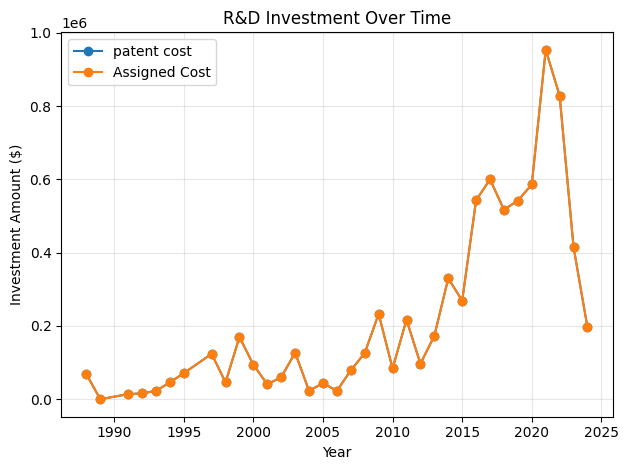

<Figure size 1200x600 with 0 Axes>

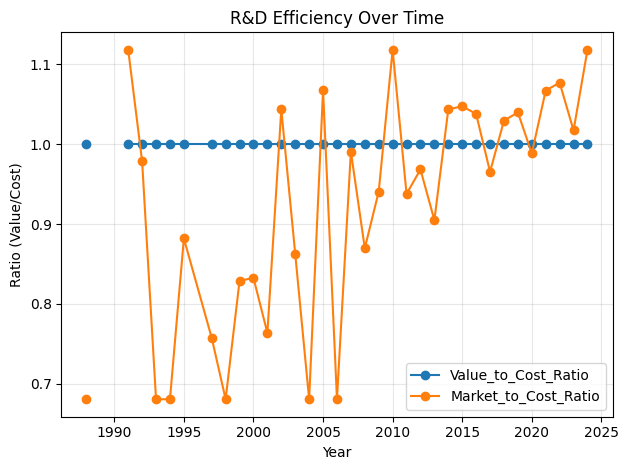

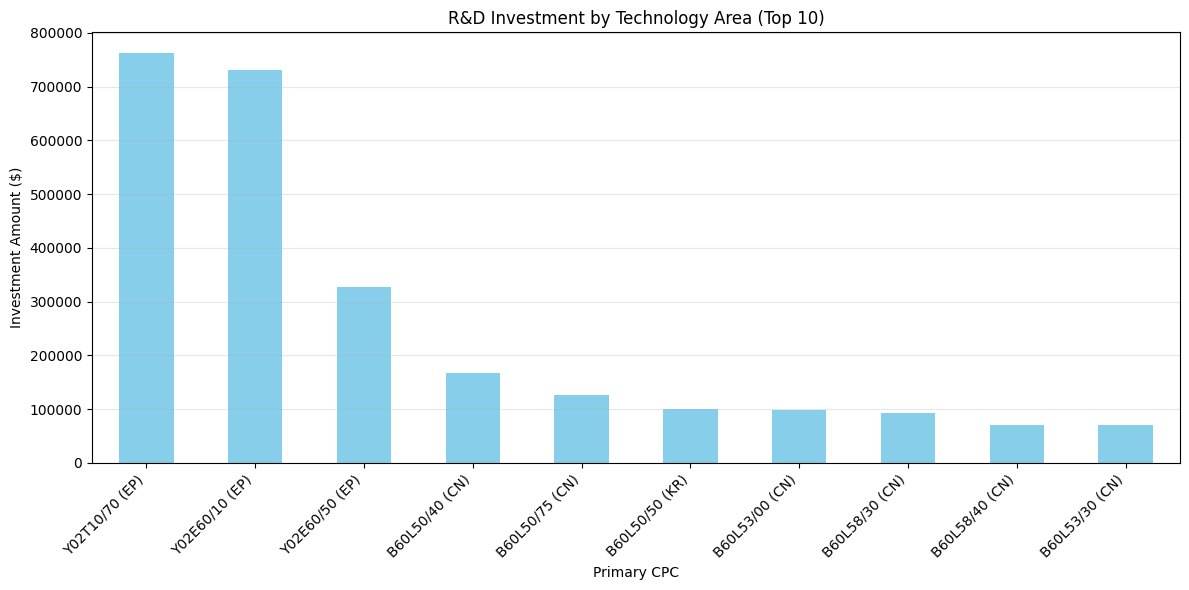

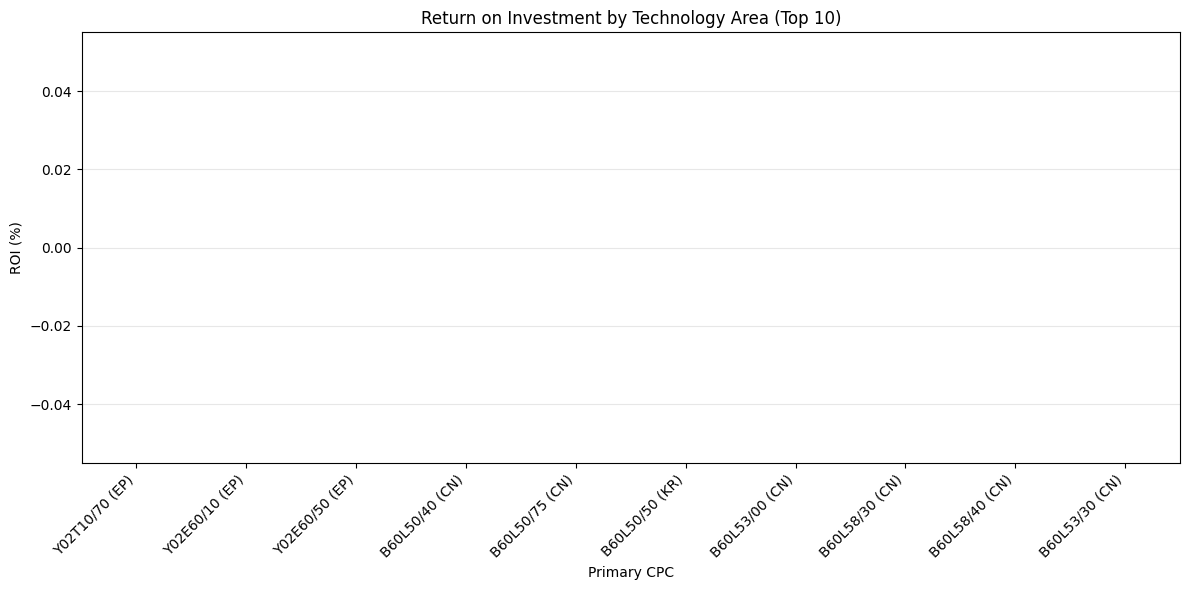

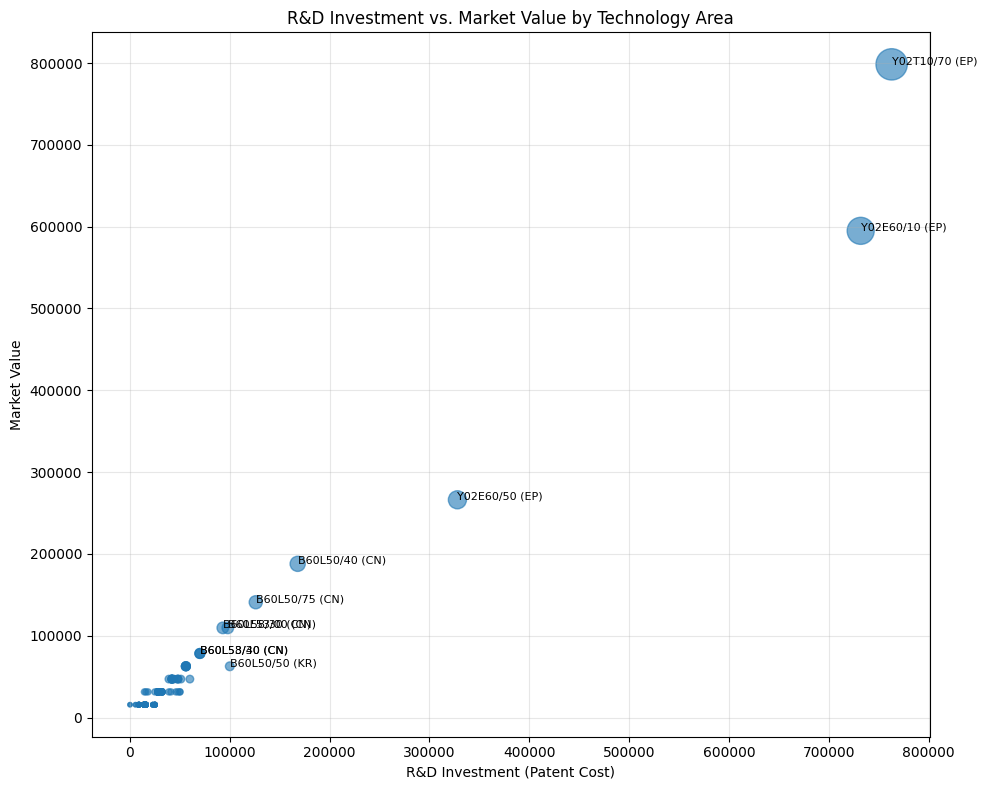


Top 5 Most Efficient R&D Investments (Highest Value-to-Cost Ratio):
1. Y02T10/70 (EP)
   Value-to-Cost Ratio: 1.00
   ROI: 0.00%
   Total Investment: $763,000.00
   Total Value: $763,000.00
2. Y02E60/10 (EP)
   Value-to-Cost Ratio: 1.00
   ROI: 0.00%
   Total Investment: $732,000.00
   Total Value: $732,000.00
3. Y02E60/50 (EP)
   Value-to-Cost Ratio: 1.00
   ROI: 0.00%
   Total Investment: $328,000.00
   Total Value: $328,000.00
4. B60L50/40 (CN)
   Value-to-Cost Ratio: 1.00
   ROI: 0.00%
   Total Investment: $168,000.00
   Total Value: $168,000.00
5. B60L50/75 (CN)
   Value-to-Cost Ratio: 1.00
   ROI: 0.00%
   Total Investment: $126,000.00
   Total Value: $126,000.00

Top 5 Least Efficient R&D Investments (Lowest Value-to-Cost Ratio):
1. Y02T10/70 (EP)
   Value-to-Cost Ratio: 1.00
   ROI: 0.00%
   Total Investment: $763,000.00
   Total Value: $763,000.00
2. Y02E60/10 (EP)
   Value-to-Cost Ratio: 1.00
   ROI: 0.00%
   Total Investment: $732,000.00
   Total Value: $732,000.00
3. Y02E6

{'total_rd_investment': np.float64(7780500.0),
 'overall_roi': np.float64(1.0),
 'top_efficient_techs': ['Y02T10/70 (EP)',
  'Y02E60/10 (EP)',
  'Y02E60/50 (EP)',
  'B60L50/40 (CN)',
  'B60L50/75 (CN)'],
 'bottom_efficient_techs': ['Y02T10/70 (EP)',
  'Y02E60/10 (EP)',
  'Y02E60/50 (EP)',
  'B60L50/40 (CN)',
  'B60L50/75 (CN)']}

In [ ]:
rd_investment_trends(df)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def s_curve_analysis(df, year_column, count_column=None, cumulative=True, forecast_years=5):
    """
    Perform S-curve analysis on patent data.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing patent data
    year_column : str
        Column name containing the years for analysis
    count_column : str, optional
        Column name for weighting the count (e.g., 'Market Rate', 'Mean Value')
        If None, each patent counts as 1
    cumulative : bool, default=True
        Whether to use cumulative values for the S-curve
    forecast_years : int, default=5
        Number of years to forecast beyond the data
        
    Returns:
    --------
    tuple
        (fig, params) where fig is the matplotlib figure and params is a dict
        containing the logistic function parameters and forecast data
    """
    # Prepare data
    if count_column is None:
        # Simple count of patents by year
        yearly_counts = df[year_column].value_counts().sort_index()
        y_data = yearly_counts.values
        years = yearly_counts.index
    else:
        # Weighted count using specified column
        yearly_data = df.groupby(year_column)[count_column].sum().sort_index()
        y_data = yearly_data.values
        years = yearly_data.index
    
    if cumulative:
        y_data = np.cumsum(y_data)
    
    # Convert to numpy arrays for curve fitting
    x_data = np.array(years, dtype=float)
    y_data = np.array(y_data, dtype=float)
    
    # Define logistic function (S-curve)
    def logistic_function(x, L, k, x0):
        """
        Logistic function with parameters:
        L: the curve's maximum value (carrying capacity)
        k: the logistic growth rate or steepness of the curve
        x0: the x-value of the sigmoid's midpoint
        """
        return L / (1 + np.exp(-k * (x - x0)))
    
    # Initial parameter guesses
    p0 = [max(y_data) * 1.5, 0.1, np.median(x_data)]
    
    # Fit the curve
    try:
        params, covariance = curve_fit(logistic_function, x_data, y_data, p0=p0, maxfev=10000)
        L, k, x0 = params
        
        # Create forecast range
        forecast_x = np.arange(min(x_data), max(x_data) + forecast_years + 1)
        forecast_y = logistic_function(forecast_x, L, k, x0)
        
        # Calculate R-squared
        residuals = y_data - logistic_function(x_data, L, k, x0)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y_data - np.mean(y_data))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        # Calculate growth phase
        # The growth phase is typically between 10% and 90% of capacity
        growth_start = x0 - (2.2/k)  # ~10% of capacity
        growth_end = x0 + (2.2/k)    # ~90% of capacity
        
        # Calculate current position in S-curve
        latest_year = max(x_data)
        current_value = logistic_function(latest_year, L, k, x0)
        percentage_complete = (current_value / L) * 100
        
        if percentage_complete < 10:
            phase = "Early Stage (Introduction)"
        elif percentage_complete < 70:
            phase = "Growth Stage"
        elif percentage_complete < 90:
            phase = "Maturity Stage"
        else:
            phase = "Saturation Stage"
        
        # Create figure
        fig, ax = plt.subplots(figsize=(12, 8))
        
        # Plot actual data
        ax.scatter(x_data, y_data, color='blue', label='Actual Data')
        
        # Plot fitted curve and forecast
        ax.plot(forecast_x, forecast_y, color='red', linestyle='-', label='S-Curve Fit')
        
        # Highlight the forecast section
        forecast_start = max(x_data)
        forecast_mask = forecast_x > forecast_start
        ax.plot(forecast_x[forecast_mask], forecast_y[forecast_mask], color='green', 
                linestyle='--', label='Forecast')
        
        # Add carrying capacity line
        ax.axhline(y=L, color='gray', linestyle='--', alpha=0.7, label=f'Carrying Capacity (L={L:.2f})')
        
        # Highlight growth phase
        ax.axvspan(growth_start, growth_end, alpha=0.2, color='yellow', label='Growth Phase (10-90%)')
        
        # Add current position indicator
        ax.axvline(x=latest_year, color='purple', linestyle=':', label=f'Current Position ({percentage_complete:.1f}%)')
        
        # Add labels and title
        metric_name = count_column if count_column else "Patent Count"
        cumulative_text = "Cumulative " if cumulative else ""
        ax.set_xlabel('Year')
        ax.set_ylabel(f'{cumulative_text}{metric_name}')
        ax.set_title(f'S-Curve Analysis of {cumulative_text}{metric_name} by {year_column}')
        
        # Add text with parameters
        textstr = '\n'.join((
            f'S-Curve Parameters:',
            f'L (Carrying Capacity) = {L:.2f}',
            f'k (Growth Rate) = {k:.4f}',
            f'x0 (Midpoint Year) = {x0:.2f}',
            f'R² = {r_squared:.4f}',
            f'Current Phase: {phase}',
            f'Completion: {percentage_complete:.1f}%'
        ))
        props = dict(boxstyle='round', facecolor='white', alpha=0.5)
        ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
                verticalalignment='top', bbox=props)
        
        # Formatting
        ax.grid(True, alpha=0.3)
        ax.legend(loc='best')
        
        # Adjust x-axis ticks to show only years (integers)
        plt.xticks(np.arange(min(forecast_x), max(forecast_x)+1, step=max(1, len(forecast_x)//10)))
        
        # Return results
        result_params = {
            'L': L,
            'k': k,
            'x0': x0,
            'r_squared': r_squared,
            'growth_start': growth_start,
            'growth_end': growth_end,
            'current_value': current_value,
            'percentage_complete': percentage_complete,
            'phase': phase,
            'forecast_years': forecast_x[forecast_mask],
            'forecast_values': forecast_y[forecast_mask]
        }
        
        return fig, result_params
    
    except Exception as e:
        print(f"Error in curve fitting: {e}")
        return None, None

def run_multiple_s_curves(df, year_columns, value_columns=None, cumulative=True, forecast_years=5):
    """
    Run S-curve analysis on multiple year columns or value columns
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing patent data
    year_columns : list
        List of column names for years to analyze
    value_columns : list, optional
        List of value columns to use for weighting
    cumulative : bool, default=True
    forecast_years : int, default=5
    
    Returns:
    --------
    dict
        Dictionary of figures and parameters for each analysis
    """
    results = {}
    
    if value_columns is None:
        value_columns = [None]
    
    for year_col in year_columns:
        for val_col in value_columns:
            key = f"{year_col}_{val_col}" if val_col else year_col
            fig, params = s_curve_analysis(
                df, year_col, val_col, cumulative, forecast_years
            )
            if fig:
                results[key] = (fig, params)
    
    return results

# Example usage
if __name__ == "__main__":
    # Assuming df is your patent dataframe
    # fig, params = s_curve_analysis(df, 'earliest priority year', 'Market Rate')
    # plt.show()
    
    # Or run multiple analyses
    # results = run_multiple_s_curves(
    #     df, 
    #     ['earliest priority year', 'first filing year'], 
    #     ['Market Rate', 'Mean Value']
    # )
    pass

In [ ]:
s_curve_analysis(df,df['Publication Year'])

KeyError: "None of [Index([2006.0, 2023.0, 2023.0,    nan, 2022.0, 2018.0,    nan, 2013.0, 2021.0,\n       2013.0,\n       ...\n       2015.0, 2020.0, 2023.0,    nan, 2018.0, 2019.0, 2012.0, 2015.0, 2023.0,\n       2022.0],\n      dtype='float64', length=497)] are in the [columns]"